In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [72]:
# !git clone https://github.com/rheadoshi/PRML
# dataset = pd.read_csv("C:/Users/prana/OneDrive/Documents/GitHub/PRML-Project/PRML/healthcare-dataset-stroke-data.csv")
# dataset.head()

!git clone 'https://github.com/rheadoshi/PRML'
dataset = pd.read_csv('/content/PRML/healthcare-dataset-stroke-data.csv')
dataset.head()

fatal: destination path 'PRML' already exists and is not an empty directory.


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Visualisation

In [73]:
# generating pull request
dataset.shape

(5110, 12)

In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


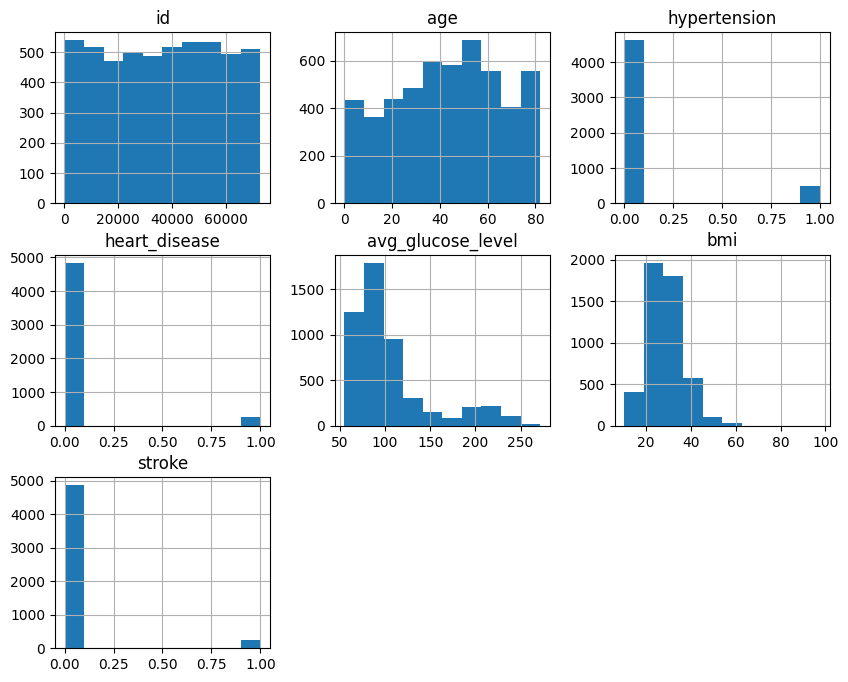

In [75]:
dataset.hist(figsize=(10, 8))
plt.show()

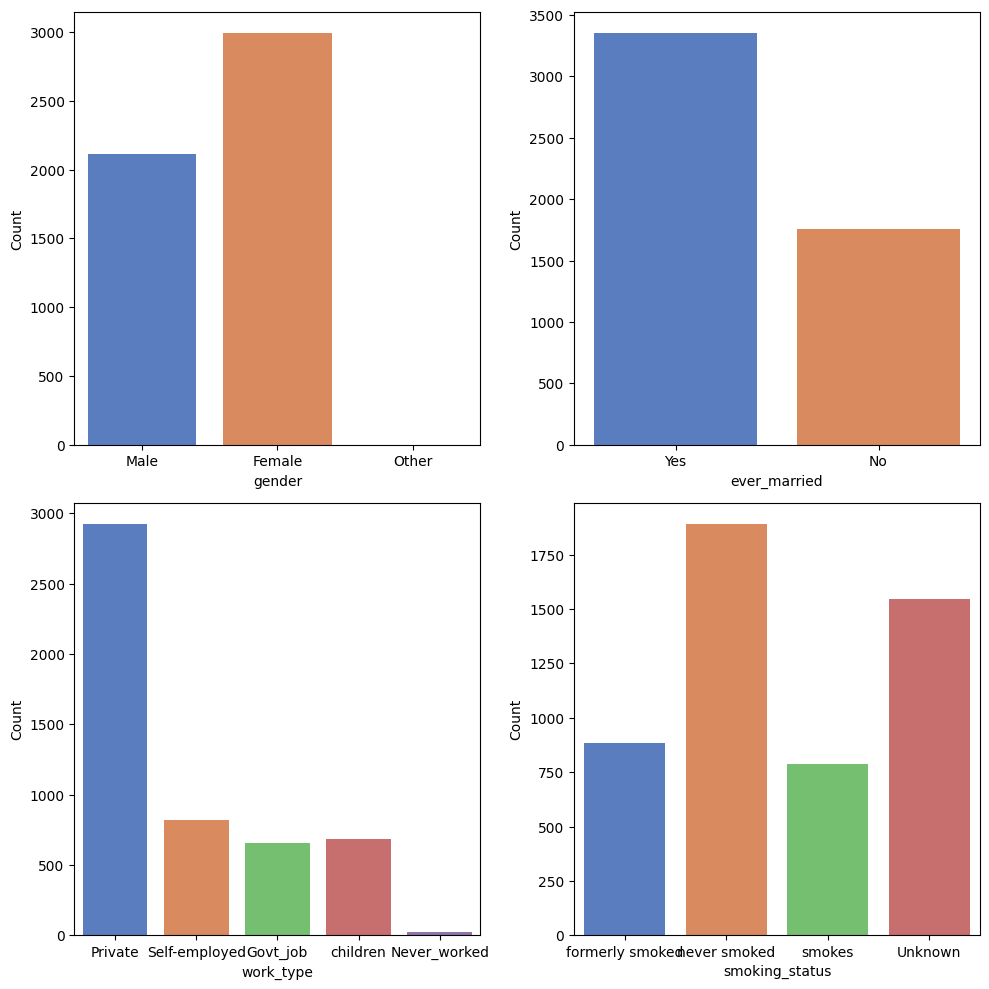

In [76]:
plt.figure(figsize=(10,10))
plotnumber = 1
columns = ['gender', 'ever_married','work_type','smoking_status']

for col in columns:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.countplot(x=col, data=dataset, palette='muted')
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Count', fontsize=10)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

# Data Pre-Processing

Encoding

In [77]:
# Importing necessary libraries
from sklearn.preprocessing import LabelEncoder

# List of columns to be encoded
cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

# Initializing LabelEncoder
le = LabelEncoder()

# Encoding categorical columns
for col in cols:
    # Fitting LabelEncoder on the column and transform it
    dataset.loc[:, col] = le.fit_transform(dataset.loc[:, col])
    
    # Converting the encoded column to integer type
    dataset[col] = dataset[col].astype(int)

dataset = dataset.drop(columns=['id'])

# Displaying the first few rows of the dataset
dataset.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [78]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int32  
dtypes: float64(3), int32(6), int64(2)
memory usage: 319.5 KB


We can see some data is missing for bmi feature. So to fill in the that data, we can find average value of bmi grouping them by gender and age.  


In [79]:
# Creating a new column 'Age_class' based on age ranges
dataset['Age_class'] = dataset['age'].apply(lambda x: 1 if x < 25 else (2 if x < 50 else 3))


In [80]:
print((dataset.groupby(['gender', 'Age_class'])['bmi'].agg(['mean'])))

                       mean
gender Age_class           
0      1          23.714660
       2          30.653965
       3          30.568066
1      1          22.603565
       2          31.305913
       3          30.776571
2      2          22.400000


In [81]:
# Handling missing values in the 'bmi' column by filling them with a placeholder value (-1)
dataset["bmi"] = dataset["bmi"].fillna(-1)

# Iterating over each row in the dataset
for i in range(dataset.shape[0]):
    # Checking if the 'bmi' value is missing (-1)
    if dataset.loc[i, 'bmi'] == -1:
        # Assigning BMI values based on age class and gender
        
        # Age class 1
        if dataset.loc[i, 'Age_class'] == 1:
            if dataset.loc[i, 'gender'] == 0:
                dataset.loc[i, 'bmi'] = 23.71
            else:
                dataset.loc[i, 'bmi'] = 22.60
        # Age class 3
        elif dataset.loc[i, 'Age_class'] == 3:
            if dataset.loc[i, 'gender'] == 0:
                dataset.loc[i, 'bmi'] = 30.57
            else:
                dataset.loc[i, 'bmi'] = 30.78
        # Other age classes
        else:
            if dataset.loc[i, 'gender'] == 0:
                dataset.loc[i, 'bmi'] = 30.65
            elif dataset.loc[i, 'gender'] == 1:
                dataset.loc[i, 'bmi'] = 31.31
            # Other genders
            else:
                dataset.loc[i, 'bmi'] = 22.4


In [82]:
dataset.drop(columns=['Age_class'],inplace = True)
print(((dataset.isna().sum())/dataset.shape[0])*100)


gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64


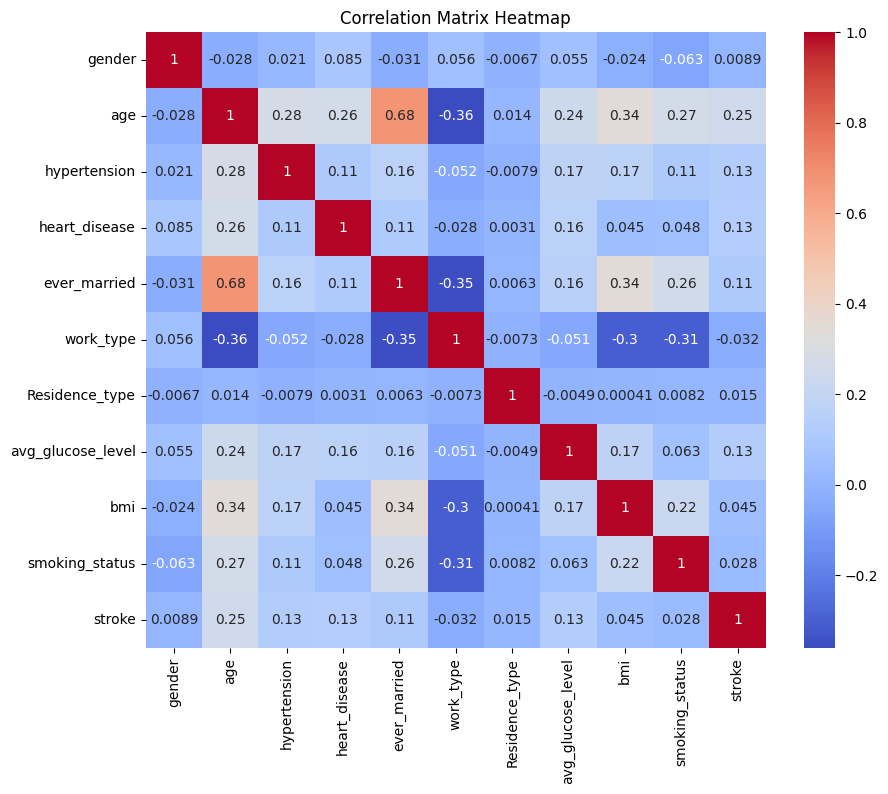

In [83]:
plt.figure(figsize=(10, 8))
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Handling Outliers

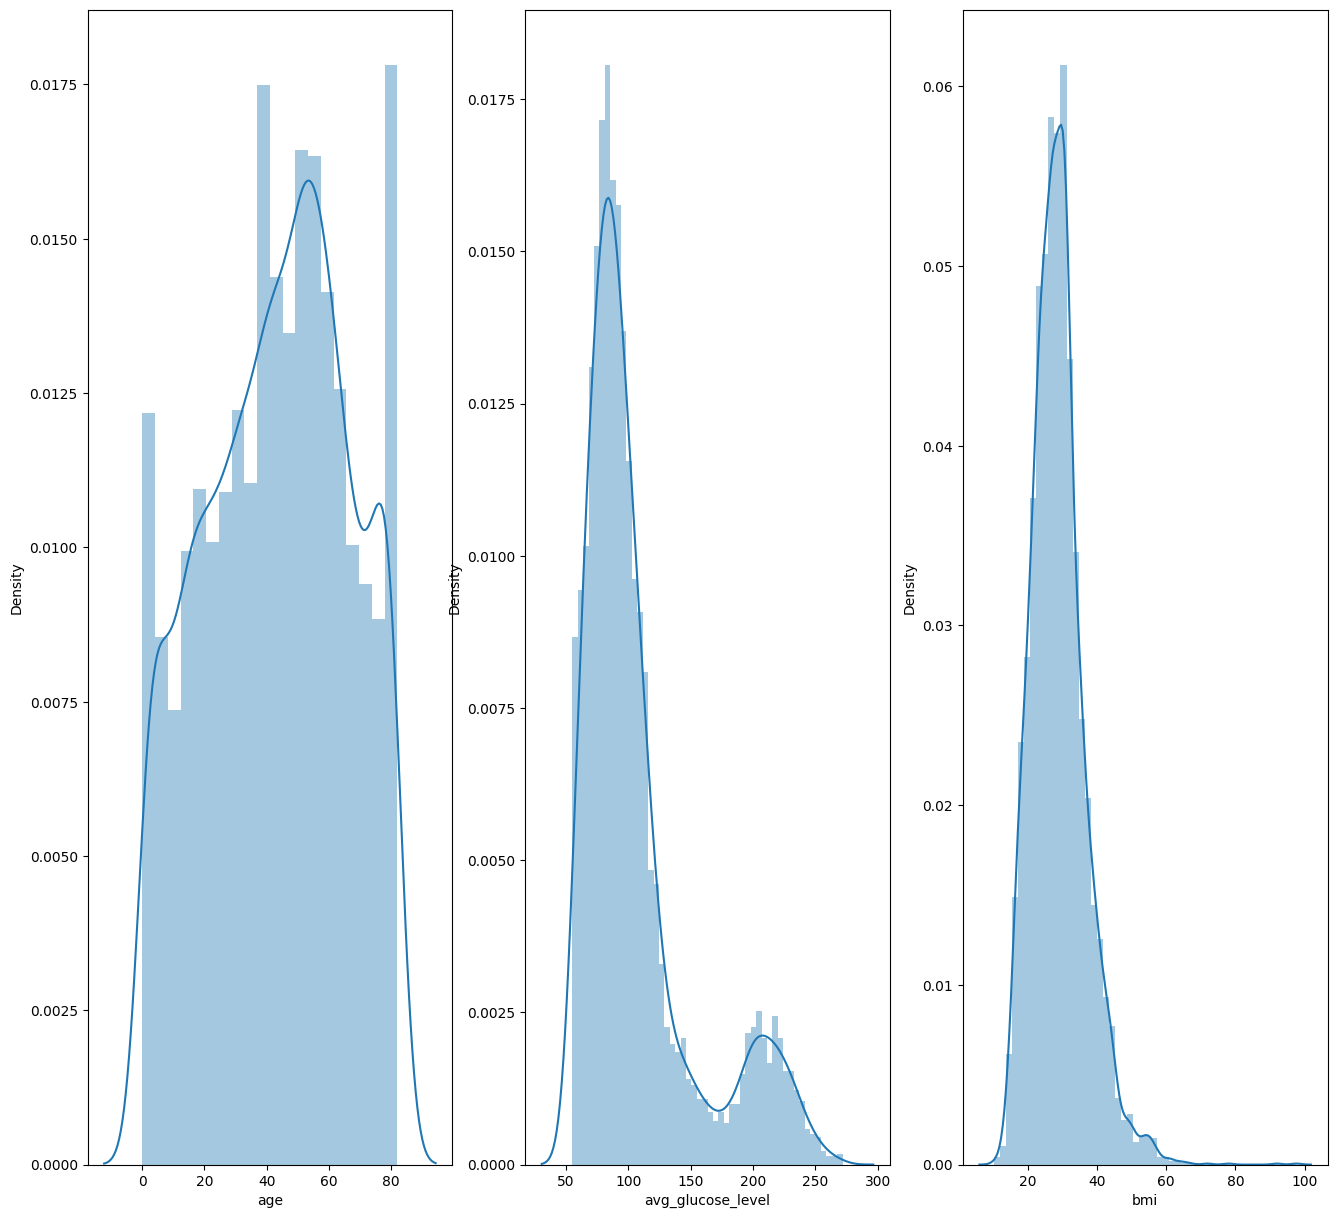

In [84]:
## Numerical columns -> age, avg_glucose_level, bmi
plt.figure(figsize=(16,15))
plt.subplot(1,3,1)
sns.distplot(dataset['age'])

plt.subplot(1,3,2)
sns.distplot(dataset['avg_glucose_level'])

plt.subplot(1,3,3)
sns.distplot(dataset['bmi'])

plt.show()

<Axes: ylabel='age'>

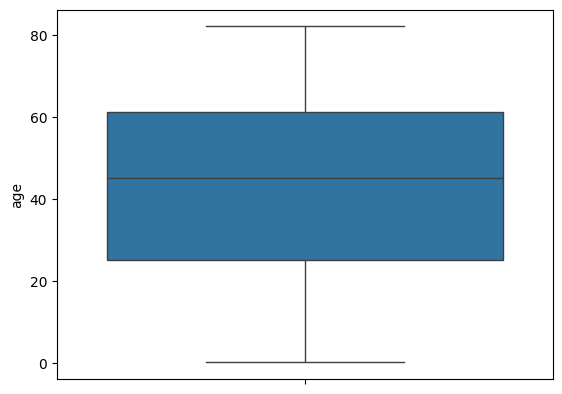

In [85]:
sns.boxplot(dataset['age'])

<Axes: ylabel='avg_glucose_level'>

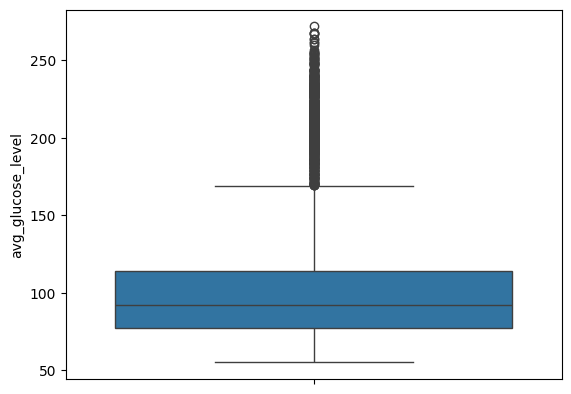

In [86]:
sns.boxplot(dataset['avg_glucose_level'])

<Axes: ylabel='bmi'>

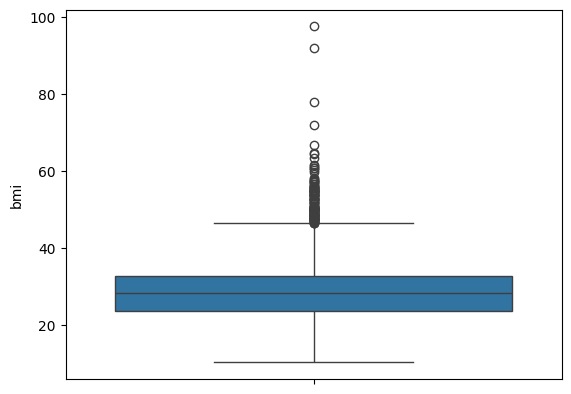

In [87]:
sns.boxplot(dataset['bmi'])

##### We can observe that age feature does not contain any outliers. To handle the outliers in other two features, avg_glucose_level and bmi  We will use SMOTE technique

In [88]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=45)

X=dataset.drop(columns=['stroke'])
y=dataset['stroke']

x_sm, y_sm = sm.fit_resample(X, y)

In [89]:
# Removing outliers
outlier = ['avg_glucose_level', 'bmi']
Q1 = x_sm[outlier].quantile(0.25)
Q3 = x_sm[outlier].quantile(0.75)
IQR = Q3 - Q1
x_sm = x_sm[~((x_sm[outlier] < (Q1 - 1.5 * IQR)) | (x_sm[outlier] > (Q3 + 1.5 * IQR))).any(axis=1)]


<Axes: ylabel='bmi'>

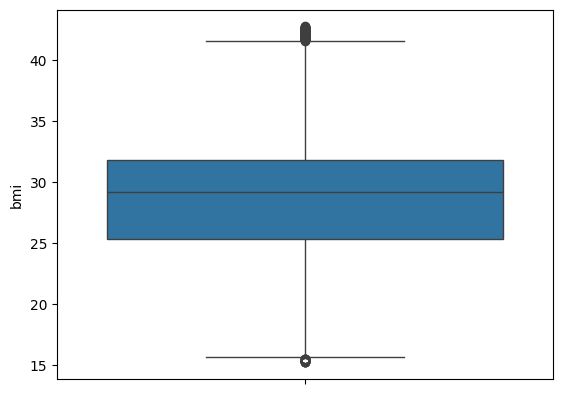

In [90]:
# Now here we can see from box plot that we have almost negligible outliers

sns.boxplot(x_sm['bmi'])

<Axes: ylabel='avg_glucose_level'>

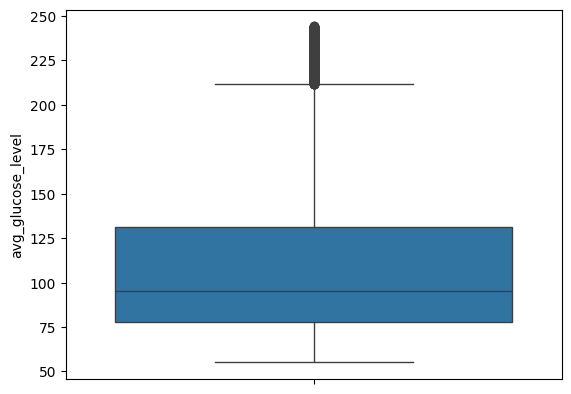

In [91]:
sns.boxplot(x_sm['avg_glucose_level'])

# Splitting Dataset

In [92]:
# Resetting the  index
x_sm.reset_index(drop=True, inplace=True)
y_sm = y_sm[x_sm.index]  # Align y with X after outlier removal

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=42)

In [93]:
y_train.value_counts()

knn_x_train = x_train
knn_y_test = y_test
knn_x_test = x_test
knn_y_train = y_train

In [94]:
np.sum(dataset['stroke'] == 0)

4861

# Models

## Decision Tree

In [95]:
class DecisionTree:
    def __init__(self, max_depth=None):
        #Initializing the DecisionTree class with a specified maximum depth.
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        """Fit the decision tree to the training data."""
        self.tree = self._build_tree(X, y, depth=0)

    def calculate_entropy(self,col):
        """Calculate the entropy of a column."""
        data, counts = np.unique(col, return_counts=True)
        N = int(col.shape[0])

        entropy = 0.0

        for count in counts:
            p = count / N
            entropy += p * np.log2(p)

        return -entropy

    def information_gain(self,y, y_left, y_right):
        """Calculates the information gain of a split."""
        parent_entropy = self.calculate_entropy(y)
        left_weight = len(y_left) / len(y)
        right_weight = len(y_right) / len(y)
        child_entropy = left_weight * self.calculate_entropy(y_left) + right_weight * self.calculate_entropy(y_right)
        return parent_entropy - child_entropy

    def _build_tree(self, X, y, depth):
        """Recursively builds the decision tree."""
        if depth == self.max_depth or len(set(y)) == 1:
            # If max depth reached or pure node ==> leaf node
            return {'class': max(set(y), key=y.tolist().count), 'is_leaf': True}

        best_split_attribute, best_split_value = self._get_best_split(X, y)

        if best_split_attribute is None:
            # information gain = 0 ==> leaf node
            return {'class': max(set(y), key=y.tolist().count), 'is_leaf': True}

        left_indices = X[best_split_attribute] == best_split_value
        right_indices = ~left_indices

        if len(left_indices) == 0 or len(right_indices) == 0:
            # If a split = empty subset ==> leaf node
            return {'class': max(set(y), key=y.tolist().count), 'is_leaf': True}

        left_subtree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return {
            'attribute': best_split_attribute,
            'value': best_split_value,
            'left': left_subtree,
            'right': right_subtree,
            'is_leaf': False
        }

    def _get_best_split(self, X, y):
        """Finding the best split for the decision tree."""
        best_information_gain = 0
        best_split_attribute = None
        best_split_value = None

        for feature in X.columns:
            categories = X[feature].unique()
            for category in categories:
                left_indices = X[feature] == category
                right_indices = ~left_indices

                y_left, y_right = y[left_indices], y[right_indices]
                current_information_gain = self.information_gain(y, y_left, y_right)

                if current_information_gain > best_information_gain:
                    best_information_gain = current_information_gain
                    best_split_attribute = feature
                    best_split_value = category

        return best_split_attribute, best_split_value

    def predict(self, X):
        """Predicts the classes of input samples."""
        if self.tree is None:
            raise ValueError("The decision tree has not been fitted yet.")

        return np.array([self._traverse_tree(x, self.tree) for _, x in X.iterrows()])

    def _traverse_tree(self, sample, node):
        """Traverses the decision tree to predict the class of a sample."""
        while not node['is_leaf']:
            attribute = node['attribute']
            value = node['value']

            if sample[attribute] == value:
                node = node['left']
            else:
                node = node['right']

        return node['class']
    
# X=dataset.drop(columns=['stroke'])
# y=dataset['stroke']

# x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)


In [96]:
max_depth_values = [3, 5, 7, 10]

# Performing hyperparameter tuning
best_accuracy = 0
best_max_depth = None
best=None
for max_depth in max_depth_values:
    dt = DecisionTree(max_depth=max_depth)
    dt.fit(x_train, y_train)
    accuracy = accuracy_score(y_train,dt.predict(x_train))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_depth = max_depth
        best=dt


y_predicted = best.predict(x_test)

# evaluation
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7060755336617406
Precision: 0.683105981112277
Recall: 0.7347629796839729
F1-score: 0.7079934747145188


## K-Nearest Neighbours

In [28]:
# Convert all columns to numeric
knn_x_train = knn_x_train.apply(pd.to_numeric)
knn_x_test = knn_x_test.apply(pd.to_numeric)


In [99]:
from collections import Counter
import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X.values
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X.values]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]

        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


knn_x_train.reset_index(drop=True, inplace=True)
knn_y_train.reset_index(drop=True, inplace=True)
knn_x_test.reset_index(drop=True, inplace=True)


In [100]:
knn = KNN(3)
knn.fit(knn_x_train, knn_y_train)
y_predicted = knn.predict(knn_x_test)

In [34]:
# evaluation
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.873015873015873
Precision: 0.8090737240075614
Recall: 0.9661399548532731
F1-score: 0.8806584362139918


## Naive Bayes

In [101]:
class NaiveBayes:
    def __init__(self):
        # Dictionary to store class probabilities
        self.class_probabilities = {}
        # Dictionary to store feature probabilities
        self.feature_probabilities = {}

    def fit(self, X, y):
        # Check if input data types are correct
        if not isinstance(X, pd.DataFrame):
            raise ValueError("X must be a pandas DataFrame")
        if not isinstance(y, pd.Series):
            raise ValueError("y must be a pandas Series")

        # Calculate class probabilities
        self.class_probabilities = self.calculate_class_probabilities(y)
        # Calculate feature probabilities
        self.feature_probabilities = self.calculate_feature_probabilities(X, y)

    def calculate_class_probabilities(self, y):
        # Dictionary to store class counts
        class_counts = {}
        total_samples = len(y)
        # Calculate frequency of each class label
        for label in y.unique():
            class_counts[label] = np.sum(y == label) / total_samples
        return class_counts

    def calculate_feature_probabilities(self, X, y):
        # Dictionary to store feature probabilities for each class label
        feature_probabilities = {}
        # Calculate mean and standard deviation for each feature in each class
        for label in y.unique():
            label_indices = y[y == label].index
            label_data = X.loc[label_indices]
            feature_probabilities[label] = {
                'mean': label_data.mean(),
                'std': label_data.std() + 1e-6  # Add a small value to avoid division by zero
            }
        return feature_probabilities

    def calculate_likelihood(self, x, mean, std):
        # Calculate likelihood using Gaussian distribution
        return np.exp(-((x - mean) ** 2) / (2 * std ** 2)) / (np.sqrt(2 * np.pi) * std)

    def predict_proba(self, X):
        # List to store class probabilities for each sample
        probabilities = []
        # Calculate probabilities for each sample
        for x in X.values:
            class_probabilities = {}
            # Calculate class probabilities using likelihood and prior probabilities
            for label, class_prob in self.class_probabilities.items():
                feature_probs = self.feature_probabilities[label]
                likelihoods = self.calculate_likelihood(x, feature_probs['mean'], feature_probs['std'])
                class_probabilities[label] = np.prod(likelihoods) * class_prob
            probabilities.append(class_probabilities)
        return probabilities

    def predict(self, X):
        # Getting the  class probabilities for each sample
        probas = self.predict_proba(X)
        # List to store predicted labels
        predictions = []
        # Assigning label with highest probability as prediction
        for proba in probas:
            predictions.append(max(proba, key=proba.get))
        return predictions


In [102]:
# Training and testing
naive_bayes = NaiveBayes()
naive_bayes.fit(x_train, y_train)
y_predicted = naive_bayes.predict(x_test)

# evaluation
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7679255610290093
Precision: 0.727810650887574
Recall: 0.8329571106094809
F1-score: 0.7768421052631579


## Random Forest

In [103]:
from tqdm import tqdm
class RandomForest:
    def __init__(self, n_estimators=5, max_depth=None, bootstrap=True):
        # Initializies the Random Forest with specified parameters
        self.n_estimators = n_estimators  # Number of decision trees in the forest
        self.max_depth = max_depth  # Maximum depth of each decision tree
        self.bootstrap = bootstrap  # Whether to use bootstrapping for sampling
        self.trees = []  # List to store decision trees

    def fit(self, X, y):
        # Looping over the number of estimators (decision trees) and fit each tree
        for _ in tqdm(range(self.n_estimators), desc="Fitting Random Forest"):
            # Create a new decision tree
            tree = DecisionTree(max_depth=self.max_depth)
            # Generate a bootstrap sample if enabled
            if self.bootstrap:
                # Sample indices with replacement
                indices = np.random.choice(len(X), len(X), replace=True)
                # Select rows from X and y using the sampled indices
                X_bootstrap = X.iloc[indices]  # Use iloc for indexing DataFrame by integer location
                y_bootstrap = y.iloc[indices]
            else:
                X_bootstrap = X
                y_bootstrap = y
            # Fit the decision tree using the bootstrap sample
            tree.fit(X_bootstrap, y_bootstrap)
            # Add the trained decision tree to the forest
            self.trees.append(tree)

    def predict(self, X):
        # Make predictions for each tree in the forest
        predictions = np.array([tree.predict(X) for tree in self.trees])
        # Aggregate predictions by averaging across all trees
        return np.mean(predictions, axis=0)


In [104]:

# Training and testing
rf = RandomForest()
rf.fit(x_train, y_train)
y_predicted = rf.predict(x_test)

#converting continous to discrete class labels
y_predicted_binary = (y_predicted > 0.5).astype(int)

# evaluation
accuracy = accuracy_score(y_test, y_predicted_binary)
precision = precision_score(y_test, y_predicted_binary)
recall = recall_score(y_test, y_predicted_binary)
f1 = f1_score(y_test, y_predicted_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Fitting Random Forest:   0%|          | 0/5 [00:00<?, ?it/s]

Fitting Random Forest: 100%|██████████| 5/5 [1:28:35<00:00, 1063.10s/it]


Accuracy: 0.8637110016420362
Precision: 0.8377518557794273
Recall: 0.891647855530474
F1-score: 0.8638600328048114


## ANN

In [105]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV



# Convert into tensors to tensors
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Define your neural network
class ANN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Creating a wrapper class compatible with scikit-learn's estimator interface for GridSearch
class ANNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, hidden_dim=64, output_dim=1, lr=0.001, num_epochs=10):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.lr = lr
        self.num_epochs = num_epochs

    def fit(self, X, y):
        # Converts data into PyTorch DataLoader
        train_data = TensorDataset(X, y)
        train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

        # Initializes the model, loss function, and optimizer
        self.model = ANN(self.input_dim, self.hidden_dim, self.output_dim)
        criterion = nn.BCEWithLogitsLoss() # Binary Cross-Entropy Loss
        optimizer = optim.Adam(self.model.parameters(), lr=self.lr) # Adam optimizer

        # Training
        for epoch in range(self.num_epochs):
            self.model.train()
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = criterion(outputs, labels.view(-1, 1))
                loss.backward()
                optimizer.step()
        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(X)
            predictions = torch.round(torch.sigmoid(outputs)) # Round to 0 or 1
            return predictions.numpy().astype(int)

# Define a parameter grid for hyperparameter tuning
param_grid = {'hidden_dim': [32, 64, 128],}


grid_search = GridSearchCV(estimator=ANNClassifier(input_dim=x_train.shape[1]),
                           param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(x_train_tensor, y_train_tensor)

# Get the best parameters
best_params = grid_search.best_params_
best_hidden_dim = best_params['hidden_dim']

# Training the model with the best hyperparameters
best_model = ANNClassifier(input_dim=x_train.shape[1], hidden_dim=best_hidden_dim).fit(x_train_tensor, y_train_tensor)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [106]:
# Testing
y_predicted = best_model.predict(x_test_tensor)
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)

print(np.sum(y_predicted))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

1002
Accuracy: 0.7766830870279147
Precision: 0.7385229540918163
Recall: 0.835214446952596
F1-score: 0.7838983050847458
